# Tensorflow Clothing Classification Intro

Classifying the MNIST-esque Fashion dataset. 

Where the dataset comprises of images stored as 28x28 greyscale NumPy arrays with values 0-255. The images are labelled with an integer from 0-9 representing what item of clothing is shown. 

Such that:

0 = T-shirt/top  
1 = Trouser  
2 = Pullover  
3 = Dress  
4 = Coat  
5 = Sandal  
6 = Shirt  
7 = Sneaker  
8 = Bag  
9 = Ankle boot  

### Importing the Dataset & Readying Libraries

In [8]:
# Import libraries

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Import and load MNIST Fashion dataset

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
# Saving class names for later use

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Exploring the Dataset

In [23]:
print('train_images dataset dimensions: {}.'.format(train_images.shape))
print('train_labels dataset dimensions: {}.'.format(train_labels.shape))
print('test_images dataset dimensions: {}.'.format(test_images.shape))
print('test_labels dataset dimensions: {}.'.format(test_labels.shape))

train_images dataset dimensions: (60000, 28, 28).
train_labels dataset dimensions: (60000,).
test_images dataset dimensions: (10000, 28, 28).
test_labels dataset dimensions: (10000,).


##### Visualising first 4 images.

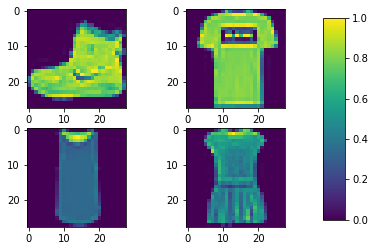

In [72]:
#Show first 4 images.
fig, axes = plt.subplots(nrows= 2, ncols=2)

for iteration,ax in enumerate(axes.flat):
    im = ax.imshow(train_images[iteration])
    ax.grid(False)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

##### Verifying correctly formatted data

Checking for appropriate labels in dataset.

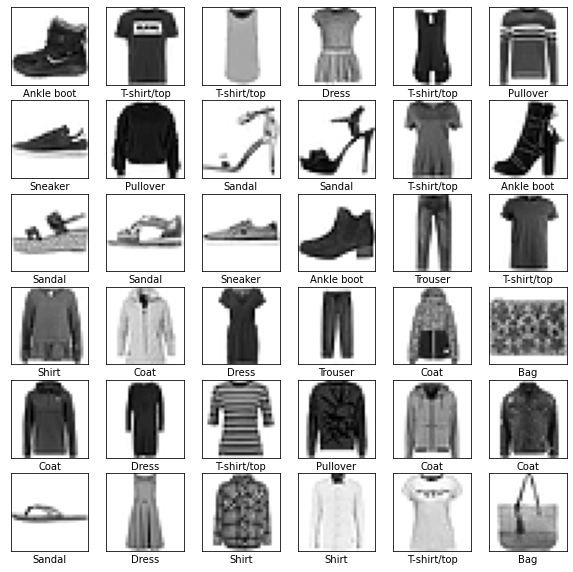

In [71]:
fig, axes = plt.subplots(nrows= 6, ncols=6, figsize=(10,10))

for iteration,ax in enumerate(axes.flat):
    im = ax.imshow(train_images[iteration], cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    ax.set_xlabel(class_names[train_labels[iteration]])
plt.show()

### Preprocessing Data

We scale image sizes to be in range 0-1 for better usage with our NN, ensuring that all features are scaled similarly.

In [56]:
# Scaling image sizes to be in range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [83]:
print('train_images feature values\nMax: {}, Min: {}.'.format(train_images.max(), train_images.min()))

train_images feature values
Max: 1.0, Min: 0.0.


### Building Model

Firstly we must define the model architecture.

In [87]:
model = keras.Sequential([
    #Transform format of image to be a 1d array 28*28=784 long, with each
    #value representing a pixel intensity.
    keras.layers.Flatten(input_shape=(28, 28)),
    #This network consists of 2 keras Dense layers with our hidden layer
    #containing 128 nodes and the output layer 10, outputing an array of logits.
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Secondly we must define some settings for the models compilation, such as 

**Loss function** - A measurement of the current accuracy of the model when training.  
**Optimizer** - How we are penalizing the innacuracy of the model and updating its parameters when training.  
**Metrics** - How we choose to monitor the model whilst it is training.

In [88]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model Training

The training of our model is completed in the following steps:  

1. Training data is fed to our model via the train_images and train_labels arrays.
2. Our model develops it's associations between images and labels based on the compilation settings and architecture.
3. We check the models predictive power on a test set (test_images), in this case for simplification a cross validation set will not be used to tune hyperparameters.
4. We verify the accuracy of our models prediction on the test set.

##### Feeding & Fitting the Model

We call model.fit to fit the model to our data, providing the train_images and train_labels. We also specify the number of epochs to run for.

In [89]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4971 - accuracy: 0.8249
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3691 - accuracy: 0.8668
Epoch 3/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3337 - accuracy: 0.8779
Epoch 4/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3112 - accuracy: 0.8855
Epoch 5/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2924 - accuracy: 0.8917
Epoch 6/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2809 - accuracy: 0.8955
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2686 - accuracy: 0.9010
Epoch 8/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2585 - accuracy: 0.9042
Epoch 9/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2492 - accuracy: 0.9075
Epoch 10/10
60

After 10 epochs the model reaches an accuracy of ~ 91% on the training data.

##### Evaluating accuracy

Comparing how our model performs on the unseen test dataset, this can provide insights in potential over/underfitting in the model or systematic errors.

In [91]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3479 - accuracy: 0.8842

Test accuracy: 0.8842


A test accuracy of ~88% on unseen data vs ~91% accuracy on our training data suggests a level of overfitting, causing our model to not generalise as expected on unseen data.

### Making Predictions

Having trained the model we can convert the logit outputs for each training sample into an array of probabilties for each of the 10 classes.

In [101]:
#the Softmax layer converts the logits into probabilities for each class
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

Predictions creates an n*10 array where examinining a given value of n will return the probabilities across the 10 classes.

In [97]:
predictions[0]

array([9.5425214e-09, 9.9190040e-12, 7.5230377e-10, 2.3459326e-10,
       6.6283059e-09, 1.5026963e-04, 7.8777207e-09, 1.8828295e-02,
       1.4525257e-09, 9.8102140e-01], dtype=float32)

We can use argmax feature to find the maximum probability value (most likely class).

In [98]:
np.argmax(predictions[0])

9

We can confirm that this class is correctly predicted.

In [102]:
np.argmax(predictions[0]) == test_labels[0]

True

We can plot the test images alongside a graph of their class probabilities to gain a greater insight into some of these examples.

Defining 2 plotting functions for the images and their probability value arrays respectively.

In [103]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

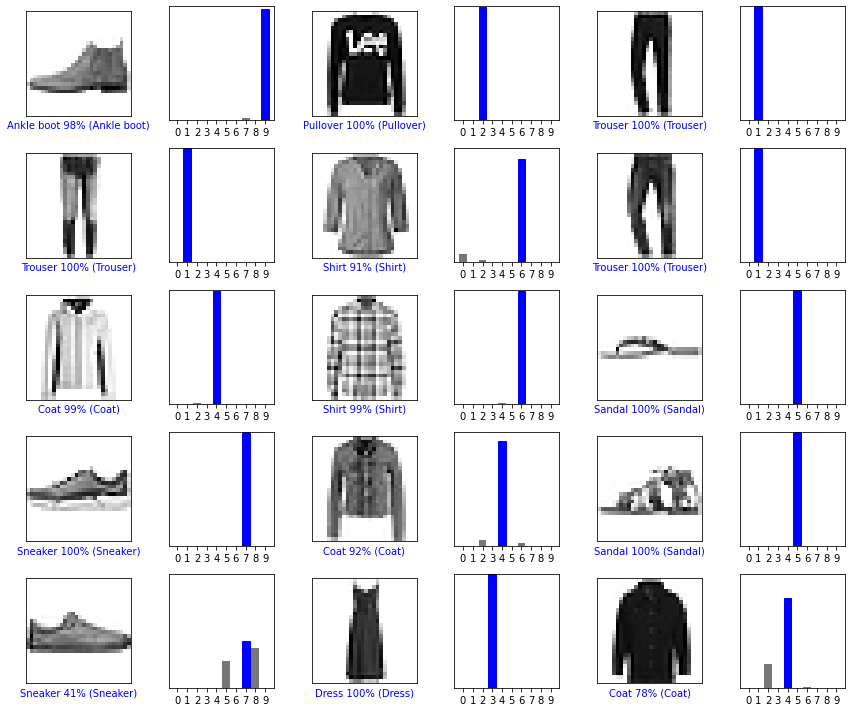

In [104]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()